# Data Analysis of the Fortnite ESL Katowice Solos Tournament

[Original reddit thread](https://www.reddit.com/r/FortniteCompetitive/comments/ayh26a/data_analysis_of_the_esl_katowice_solo_event/)

Hey, guys. You might remember me from this [post](https://www.reddit.com/r/FortniteCompetitive/comments/asa8vy/data_analysis_of_the_secret_skirmish_full/). This time I'm analyzing the results for the ESL Solo event. It was even harder to get the killfeed data for this event as I mainly had to rely on POV streams of players such as Chap, Ryux and Kinstaar. In total, it took me about 12 hours to collect all the data. Again, someone had to do it.

Once again, as a disclaimer, my native language is not english and I'm not a data science guy, but I try to present the data as best as I possibly could. Hopefully, you find it insightful or entertaining.

## Solo Event Results and Comparing Them to Secret Skirmish Results

First, we'll show the full detailed standings of all the players, showing their kills and avg. placement. This provides a lot more information than the standings provided by the event.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
esl = pd.read_csv('eslKillFeed.csv')

In [3]:
esl_placement_points = {1:65,2:58,3:56,4:54,5:52,6:50,7:48,8:46,9:44,10:42,11:40,12:39,13:38,14:37,15:36,16:35,17:34,18:33,19:32,20:31,21:30,22:29,23:28,24:27,25:26,26:25,27:24,28:23,29:22,30:21,31:20,32:19,33:18,34:17,35:16,36:15,37:14,38:13,39:12,40:11,41:10,42:9,43:8,44:7,45:6,46:5,47:4,48:3,49:2,50:1}

In [4]:
esl_p = pd.DataFrame(index = esl['Player'].unique(), columns=['Points', 'Victory Royales', 'Kill Points', 'Kills', 'Placement Points']).fillna(0)
for i, row in esl.iterrows():
    esl_p['Kills'][row['Player']] += row['Kills']
    esl_p['Points'][row['Player']] += row['Kills']*5
    esl_p['Kill Points'][row['Player']] += row['Kills']*5
    if (row['Placed'] < 51):
        esl_p['Points'][row['Player']] += esl_placement_points[row['Placed']]
        esl_p['Placement Points'][row['Player']] += esl_placement_points[row['Placed']]
    if (row['Placed']==1):
        esl_p['Victory Royales'][row['Player']] +=1
esl_p['Avg. Placement'] = esl.groupby('Player')['Placed'].mean()
esl_p = esl_p.sort_values(['Points','Victory Royales','Kills', 'Avg. Placement'], ascending=[False, False, False, True]).reset_index()
esl_p.index+=1
esl_p = esl_p.reset_index().rename(columns={'level_0':'Rank', 'index':'Player'})

In [5]:
esl_p

,Rank,Player,Points,Victory Royales,Kill Points,Kills,Placement Points,Avg. Placement
0,1,Vinny1x,329,0,75,15,254,21.571429
1,2,Magin,316,0,85,17,231,25.714286
2,3,Kinstaar,269,1,50,10,219,23.000000
3,4,Bizzle,255,1,45,9,210,29.714286
4,5,Skite,248,0,55,11,193,24.714286
5,6,Animal,244,1,45,9,199,32.285714
6,7,Zayt,244,0,40,8,204,27.857143
7,8,Skram,237,1,45,9,192,25.714286
8,9,Ares,233,0,70,14,163,34.142857
9,10,TheVic,230,1,45,9,185,33.285714


One thing I noticed while creating this list was that my scoring didn't match the points shown in the ESL Website. Indeed, there was a scoring error from their part and I brought enough attention to get it fixed [here](https://www.reddit.com/r/FortniteCompetitive/comments/ax10jq/there_was_a_scoring_error_in_katowice_solo_event/).

Notable underperformers include Saf (65th), Aspect (69th), Chap (74th) and Poach (87th). Highest placing controller player: Kamo (27th). Viallinen was the only player not able to get a single point. 

In [6]:
players = pd.read_csv('players.csv')
players = players.merge(esl_p, how='left', left_on='Player', right_on='Player')[['Player', 'Team', 'Country', 'Rank']].sort_values('Rank')
players.groupby('Team').filter(lambda x: len(x) > 1).groupby('Team')['Rank'].mean().sort_values().head(5)

Team
LeStream    12.0
NRG         23.5
LDLC        26.5
AGO         31.5
Forward     32.5
Name: Rank, dtype: float64

In [7]:
players = pd.read_csv('players.csv')
players = players.merge(esl_p, how='left', left_on='Player', right_on='Player')[['Player', 'Team', 'Country', 'Rank']].sort_values('Country')
players.groupby('Country').filter(lambda x: len(x) > 1).groupby('Country')['Rank'].mean().sort_values().head(5)

Country
United Kingdom    23.500000
Switzerland       34.600000
Netherlands       37.000000
Germany           38.333333
United States     43.437500
Name: Rank, dtype: float64

Note: I only count teams and countries with more than 1 player.

LeStream is the top performing team with all of their 4 players in Top 20 and an average placement of 12. USA is the country with most players in Top 20 (5). However, the best performing country in terms of avg. placement is the United Kingdom (23) with their 6 players placing relatively high. 

In [8]:
esl_p.sort_values('Avg. Placement').head(20)

,Rank,Player,Points,Victory Royales,Kill Points,Kills,Placement Points,Avg. Placement
0,1,Vinny1x,329,0,75,15,254,21.571429
2,3,Kinstaar,269,1,50,10,219,23.000000
4,5,Skite,248,0,55,11,193,24.714286
1,2,Magin,316,0,85,17,231,25.714286
7,8,Skram,237,1,45,9,192,25.714286
6,7,Zayt,244,0,40,8,204,27.857143
20,21,Motor,185,0,30,6,155,28.857143
3,4,Bizzle,255,1,45,9,210,29.714286
11,12,Itemm,223,0,35,7,188,30.285714
15,16,Mitr0,205,0,45,9,160,31.857143


As we can see, the format heavily rewards good placement in each match. High average placement is a good indicator of how well you'll do in this format. We visualize this in the following graph, and compare it to the results of the Secret Skirmish.

In [9]:
ss = pd.read_csv('SecretSkirmishKillFeed.csv')
ss_placement_points = {1:3,2:2,3:2,4:1,5:1,6:1,7:1,8:1,9:1,10:1}
ss_kill_points = {0:0, 1:0, 2:0, 3:1, 4:1, 5:2, 6:2, 7:3, 8:4, 9:5, 10:6, 11:7, 12:8, 13:9, 14:10, 15:11, 16:12, 17:13, 18:14, 19:15, 20:16, 21:17}
ss_p = pd.DataFrame(index = ss['Player'].unique(), columns=['Points', 'Victory Royales', 'Kill Points', 'Kills', 'Placement Points']).fillna(0)
for i, row in ss.iterrows():
    ss_p['Kills'][row['Player']] += row['Kills']
    ss_p['Points'][row['Player']] += ss_kill_points[row['Kills']]
    ss_p['Kill Points'][row['Player']] += ss_kill_points[row['Kills']]
    if (row['Placed'] < 11):
        ss_p['Points'][row['Player']] += ss_placement_points[row['Placed']]
        ss_p['Placement Points'][row['Player']] += ss_placement_points[row['Placed']]
    if (row['Placed']==1):
        ss_p['Victory Royales'][row['Player']] +=1
ss_p['Avg. Placement'] = ss.groupby('Player')['Placed'].mean()
ss_p = ss_p.sort_values(['Points','Victory Royales','Kills','Avg. Placement'], ascending=[False, False, False, True]).reset_index()
ss_p.index+=1
ss_p = ss_p.reset_index().rename(columns={'level_0':'Rank', 'index':'Player'})

0

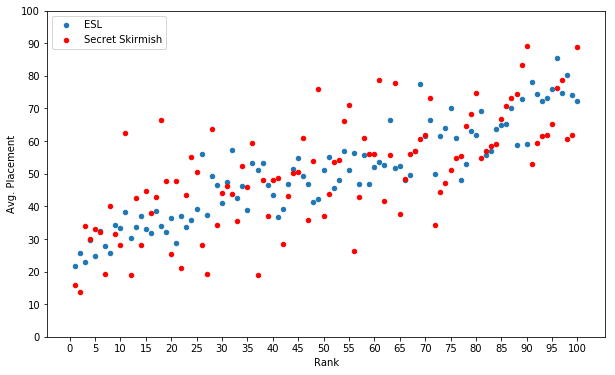

In [10]:
fig, ax = plt.subplots(figsize=(10,6))
esl_p.plot.scatter(x='Rank', y='Avg. Placement', ax=ax, label='ESL')
ss_p.plot.scatter(x='Rank', y='Avg. Placement', ax=ax, color='r', label='Secret Skirmish')
ax.set_xticks(np.arange(0,101,5))
ax.set_yticks(np.arange(0,101,10))
0

We can see a strong correlation between average placement and rank, while for the Secret Skirmish, it's less linear. The ESL format definitely does a good job in properly rewarding placement. 

In [11]:
esl_p.sort_values('Kills', ascending=False).head(20)

,Rank,Player,Points,Victory Royales,Kill Points,Kills,Placement Points,Avg. Placement
1,2,Magin,316,0,85,17,231,25.714286
35,36,Aydan,154,0,80,16,74,53.428571
10,11,Histtory,224,0,80,16,144,38.142857
0,1,Vinny1x,329,0,75,15,254,21.571429
13,14,Hoopek,208,0,70,14,138,37.000000
8,9,Ares,233,0,70,14,163,34.142857
28,29,Madzen,175,0,65,13,110,46.571429
37,38,Issa,151,0,60,12,91,53.285714
30,31,Villex,160,0,60,12,100,47.428571
31,32,Tommo,157,0,60,12,97,57.142857


As we can see, emphasis on kills is very reduced in this format. 6 out of the top 10 killers did not make it to Top 20. Not even close. 

RizArt and Viallinen are the only players without a single kill. Vinny1x and Magin are the only players who make it to both of these lists, so their standings are well deserved. Interestingly enough, Magin was #1 in kills and #4 in avg. placement, while Vinny was #1 in Avg. Placement and #4 in kills.

We can take it a step further and see how the top 20 changes under Secret Skirmish rules. See if anything changes.

In [12]:
ss_p = pd.DataFrame(index = esl['Player'].unique(), columns=['Points', 'Victory Royales', 'Kill Points', 'Kills', 'Placement Points']).fillna(0)
for i, row in esl.iterrows():
    ss_p['Kills'][row['Player']] += row['Kills']
    ss_p['Points'][row['Player']] += ss_kill_points[row['Kills']]
    ss_p['Kill Points'][row['Player']] += ss_kill_points[row['Kills']]
    if (row['Placed'] < 11):
        ss_p['Points'][row['Player']] += ss_placement_points[row['Placed']]
        ss_p['Placement Points'][row['Player']] += ss_placement_points[row['Placed']]
    if (row['Placed']==1):
        ss_p['Victory Royales'][row['Player']] +=1
ss_p['Avg. Placement'] = esl.groupby('Player')['Placed'].mean()
ss_p = ss_p.sort_values(['Points','Victory Royales','Kills','Avg. Placement'], ascending=[False, False, False, True]).reset_index()
ss_p.index+=1
ss_p = ss_p.reset_index().rename(columns={'level_0':'Rank', 'index':'Player'})
ss_p.head(20)

,Rank,Player,Points,Victory Royales,Kill Points,Kills,Placement Points,Avg. Placement
0,1,Magin,9,0,5,17,4,25.714286
1,2,Vinny1x,8,0,4,15,4,21.571429
2,3,Kinstaar,7,1,2,10,5,23.000000
3,4,Julez,6,1,2,10,4,56.142857
4,5,Bizzle,6,1,2,9,4,29.714286
5,6,TheVic,6,1,1,9,5,33.285714
6,7,Histtory,6,0,4,16,2,38.142857
7,8,Aydan,6,0,5,16,1,53.428571
8,9,Ares,6,0,3,14,3,34.142857
9,10,Jarkos,6,0,3,10,3,49.285714


A lot changes. Magin takes it over Vinny, and Julez, Aydan, and Jarkos enter the Top 10 because of their kills. Aydan's aggressive early-game playstyle is completely invalidated by the ESL Format. A lot of people with great avg. placement do worse as expected, because only top 10 counts for points.

So, while the ESL format rewards avg. placement and consistency, the Secret Skirmish format rewards high kills and popping off. In my opinion, I would like to see a format that meets somewhere in the middle. One that equally rewards early-game slayers and late-game survivors in order to promote more variety in playstyle. But, that's just me.

# Winning Playstyles

We can try to infer the playstyles of the top 20 Players by looking at how their kills are distributed across early, mid, and late-game. In the following graph, blue dots represent kills and red dots represent deaths. Each box represents the distribution of kills for each player.

In [13]:
top20 = esl_p['Player'].head(20).tolist()
esl_20 = esl[esl['KilledBy'].isin(top20)]
esl_20['Timestamp'] = pd.to_datetime(esl_20['Timestamp'], format='%M:%S')
esl_20['Timestamp'] = (esl_20['Timestamp'].dt.minute * 60) + esl_20['Timestamp'].dt.second
order = dict(zip(top20, range(len(top20))))
esl_20['order'] = esl_20['KilledBy'].map(order)
esl_20 = esl_20.sort_values('order')
esl_20_d = esl[esl['Player'].isin(top20)]
esl_20_d['Timestamp'] = pd.to_datetime(esl_20_d['Timestamp'], format='%M:%S')
esl_20_d['Timestamp'] = (esl_20_d['Timestamp'].dt.minute * 60) + esl_20_d['Timestamp'].dt.second
esl_20_d['order'] = esl_20_d['Player'].map(order)
esl_20_d = esl_20_d.sort_values('order')

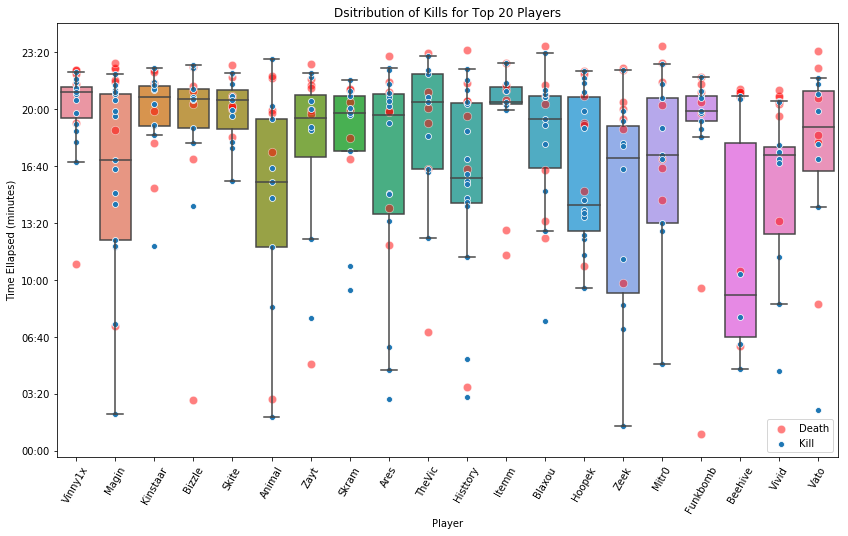

In [14]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(14,8))
sns.boxplot(x='KilledBy', y='Timestamp', ax=ax, data=esl_20, showfliers=False)
sns.scatterplot(x='Player', y='Timestamp', ax=ax, data=esl_20_d, color='r', s=70, alpha=0.5,label='Death')
sns.scatterplot(x='KilledBy', y='Timestamp', ax=ax, data=esl_20, label='Kill')

ax.tick_params('x', rotation=60)
ax.set_yticklabels([pd.to_datetime(tm, unit='s').strftime('%M:%S') for tm in ax.get_yticks()])
ax.set_xlabel('Player')
ax.set_ylabel('Time Ellapsed (minutes)')
ax.set_title('Dsitribution of Kills for Top 20 Players')
ax.legend(loc='lower right')
plt.savefig('media/graph2.png', transparent=False)

For reference, I consider early game to end around the 13th minute mark (2nd zone ends) and end game to start around the 17:00 minute mark (5th zone starts). 

Most of the Top 10 players had a lack of early and mid-game kills, focusing only on the end game plaement. For example, all of Vinny1x's 16 kills were towards the end-game. What separates him from the rest of the other players who played the same way was his high number of kills and top 50 placements in all matches.

We can actually see a lack of early-game kills and deaths across the whole Top 20. This emphasizes the importance of landing uncontested or disengaging from early game fights. One early death can mean the difference to make it to Top 20. You really, really have to play for end-game to rack up those placement points.  As we can see, the kills inevitably come as you reach the final zones. Try to think of kills as a measure to get resources and health, not as points. (All of this with storm surge under consideration).

We can still see other types of play styles. Players such as Magin, Hoopek and histtory did go for a lot of mid game fights and they payed off as they were able to win almost all of them. Go for mid-game fights if you're comfortable and certain that you can win, just know that it's risky for your overall placement. 

I know often times players are put into situations where they have no choice but to fight early. It's unfortunate as this is mainly due to a lack of mobility, getting contested, far away zones or psychopaths, things that are not always under a player's control.

It's also important to note that not a single Top 20 player got there because they "popped off" just one game. All of them have 3 or more great late-game finishes.

# Weapon Distribution

I was not able to get the cause of deaths for 35 deaths. It simply wasn't possible. The deaths I did record should still provide an accurate representation of the weapon distribution. 

In [15]:
w = esl[esl['Weapon']!='DQ']['Weapon'].value_counts().to_frame().reset_index()
w.columns=['Weapon', 'Count']
total = np.sum(w.loc[:,'Count':].values)
w['percent'] = w.loc[:,'Count':].sum(axis=1)/total * 100
w

,Weapon,Count,percent
0,Shotgun,277,42.681048
1,Rifle,131,20.184900
2,Smg,108,16.640986
3,Storm,35,5.392912
4,Sniper,28,4.314330
5,FallDamage,18,2.773498
6,Splode,15,2.311248
7,StinkGrenade,11,1.694915
8,Trap,9,1.386749
9,Pistol,9,1.386749


### Fun Facts

- Ghost Dmo got the only cannon kill, and it was on Ghost Kamo.
- Liquid Chap with the only Pickaxe kill on MarkiLokuras. This was off spawn.
- 72hrs died 4 times to storm.
- A total of 9 players had game crashes that didn't allow them to play a game. Nate's game crash was the only one that occurred mid-game (Funkbomb accidentally kicked Nate's power switch).
- Biggest rivalry of the tournament was Myth vs Noward. Noward was able to kill Myth 3 times off-spawn, while Myth only once.
- Farthest kill was a 226m snipe from Ryux to Bloodx.
- Ghost Issa was the most aggressive early-game player with 6 kills before Zone 2.
-  Secret_Milan is probably the unluckiest player getting 51st, 51st, 53rd, and 60th in 4 matches, just outside placement points.

# Match Pacing

Next, I created a graph visualizing the amount of players alive as each match progressed.

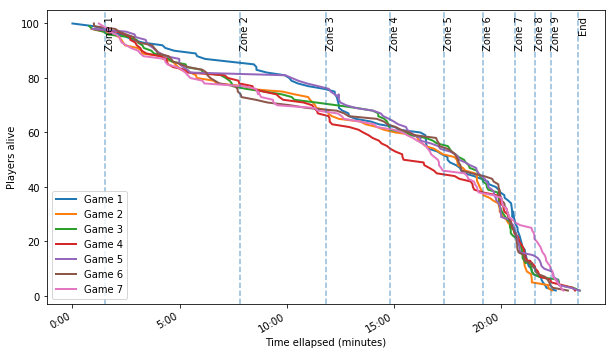

In [16]:
fig, ax = plt.subplots(figsize=(10,6))
for i in range(1,8):
    tmp = esl[(esl['Match']==i) & (esl['Timestamp'] != np.NaN)]
    tmp['Timestamp'] = pd.to_datetime(tmp['Timestamp'], format='%M:%S')
    tmp.plot('Timestamp', 'Placed',ax=ax, label='Game {}'.format(i), linewidth=2)
timestamps = ['1:30', '7:50', '11:50', '14:50', '17:20', '19:10', '20:40', '21:35', '22:20','23:35']
for i, time in enumerate(timestamps):
    ax.axvline(pd.to_datetime(time, format='%M:%S'), linestyle='--', alpha=0.5)
    ax.text(pd.to_datetime(time, format='%M:%S'),100, 'Zone %d' % (i+1) if i < 9 else 'End', rotation=90)
ax.set_xlabel('Time ellapsed (minutes)')
ax.set_ylabel('Players alive')
ax.set_xticklabels(['0:00', '5:00', '10:00', '15:00', '20:00'])
plt.savefig('media/graph3.png', transparent=False)

Deadliest zone was Zone #1 with 130 deaths. No surprise there. Not far behind, the second deadliest zone was Zone #6 (lasts 90 seconds) with 122 deaths.

I was actually more interested in how the pacing of ESL matches compared to the pacing of the Secret Skirmish games. I graphed the first 3 games of both tournaments.

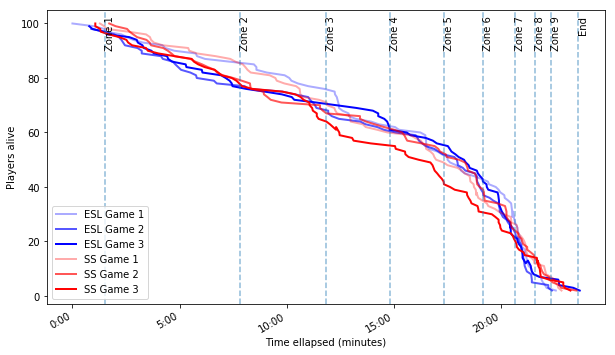

In [17]:
fig, ax = plt.subplots(figsize=(10,6))
for i in range(1,4):
    tmp = esl[(esl['Match']==i) & (esl['Timestamp'] != np.NaN)]
    tmp['Timestamp'] = pd.to_datetime(tmp['Timestamp'], format='%M:%S')
    tmp.plot('Timestamp', 'Placed',ax=ax, label='ESL Game {}'.format(i), linewidth=2, color='blue', alpha=0.33*i)
for i in range(1,4):
    tmp = ss[(ss['Match']==i) & (ss['Timestamp'] != np.NaN)]
    tmp['Timestamp'] = pd.to_datetime(tmp['Timestamp'], format='%M:%S')
    tmp.plot('Timestamp', 'Placed',ax=ax, label='SS Game {}'.format(i), linewidth=2, color='red', alpha=0.33*i)
timestamps = ['1:30', '7:50', '11:50', '14:50', '17:20', '19:10', '20:40', '21:35', '22:20','23:35']
for i, time in enumerate(timestamps):
    ax.axvline(pd.to_datetime(time, format='%M:%S'), linestyle='--', alpha=0.5)
    ax.text(pd.to_datetime(time, format='%M:%S'),100, 'Zone %d' % (i+1) if i < 9 else 'End', rotation=90)
ax.set_xlabel('Time ellapsed (minutes)')
ax.set_ylabel('Players alive')
ax.set_xticklabels(['0:00', '5:00', '10:00', '15:00', '20:00'])
plt.savefig('media/graph4.png', transparent=False)

Not enough of a difference to reach any conclusion, despite ESL's emphasis on placement. Perhaps, the Storm Surge does work in applying an upper bound of players alive each zone, leading to a very predictable quantity of players each zone.

# The End

Anyway, that's all the ideas I had. Hopefully I can do analysis of Duos. Depends if I can get the killfeed data for all the matches, which will be even harder. I accept any type of help! But anyway, let me know if there's anything else you'd like to see or if there's anything I got wrong.